## IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

## READING DATA

In [2]:
data1=pd.read_csv("1429_1.csv")

C:\Users\kavya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data1

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",

In [4]:
data2=pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [5]:
data2

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."
5,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Bought a lot of batteries for Christmas and th...,... batteries for Christmas and the AmazonBasi...,ByPainter Marlow,"https://www.barcodable.com/upc/841710106442,ht..."
6,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,ive not 

In [6]:
data3=pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [7]:
data3

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
5,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",False,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This make an excellent ebook reader. Don't exp...,Good ebook,rmwarriors,https://www.newegg.com/Product/Product.aspx%25...
6,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,187043823.0,0,5,https://redsky.target.com/groot-domain-api/v1/...,"I ordered this for my daughter, as I have the ...",Light Weight - Makes a world of difference whe...,LexieCrews,https://www.newe

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

## DATA PREPROCESSING

In [9]:
data1['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [10]:
data2 = data2[['reviews.rating' , 'reviews.text']]
data3 = data3[['reviews.rating' , 'reviews.text']]

In [11]:
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

In [12]:
data2['reviews.rating'].value_counts()

3    1206
1     965
2     616
Name: reviews.rating, dtype: int64

In [13]:
data3['reviews.rating'].value_counts()

3    197
1     63
2     54
Name: reviews.rating, dtype: int64

In [14]:
data=pd.concat([data1, data2, data3])

C:\Users\kavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
df=pd.concat([data['reviews.text'],data['reviews.rating']], axis=1)
df

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
5,This amazon fire 8 inch tablet is the perfect ...,5.0
6,"Great for e-reading on the go, nice and light ...",4.0
7,"I gave this as a Christmas gift to my inlaws, ...",5.0
8,Great as a device to read books. I like that i...,5.0
9,I love ordering books and reading them with th...,5.0


In [16]:
df['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     2902
1.0     1438
2.0     1072
Name: reviews.rating, dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df=df.reset_index()
df

,index,reviews.text,reviews.rating
0,0,This product so far has not disappointed. My c...,5.0
1,1,great for beginner or experienced person. Boug...,5.0
2,2,Inexpensive tablet for him to use and learn on...,5.0
3,3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,4,I bought this for my grand daughter when she c...,5.0
5,5,This amazon fire 8 inch tablet is the perfect ...,5.0
6,6,"Great for e-reading on the go, nice and light ...",4.0
7,7,"I gave this as a Christmas gift to my inlaws, ...",5.0
8,8,Great as a device to read books. I like that i...,5.0
9,9,I love ordering books and reading them with th...,5.0


In [19]:
df=df.drop(columns=['index'])
df

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
5,This amazon fire 8 inch tablet is the perfect ...,5.0
6,"Great for e-reading on the go, nice and light ...",4.0
7,"I gave this as a Christmas gift to my inlaws, ...",5.0
8,Great as a device to read books. I like that i...,5.0
9,I love ordering books and reading them with th...,5.0


In [20]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}
df['sentiment']=df['reviews.rating'].map(sentiment)

In [21]:
counts=df['sentiment'].value_counts()
counts

1    32315
0     5412
Name: sentiment, dtype: int64

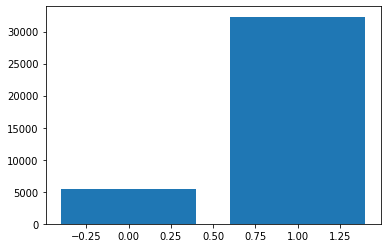

In [22]:
plt.bar(counts.index, counts.values)
plt.show()

## WORDCLOUD

In [23]:
words = pd.Series(' '.join(df['reviews.text']).split())

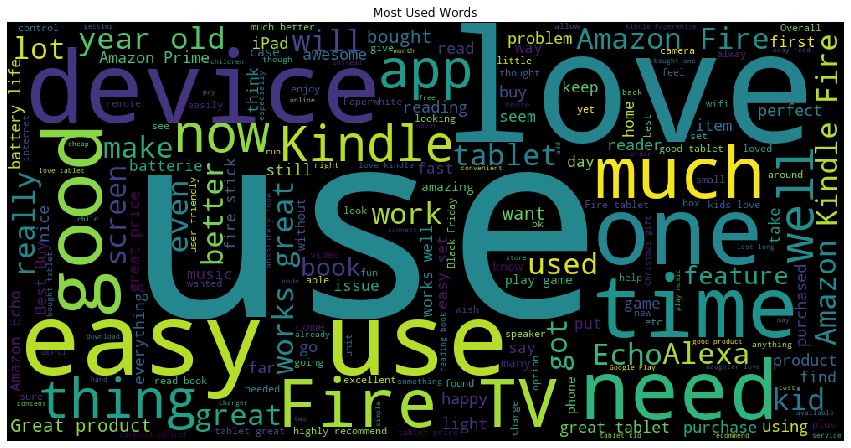

In [24]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Used Words")
plt.axis("off")
plt.show()

In [25]:
positiveWords=words = pd.Series(' '.join(df[df['sentiment']==1]['reviews.text']).split())

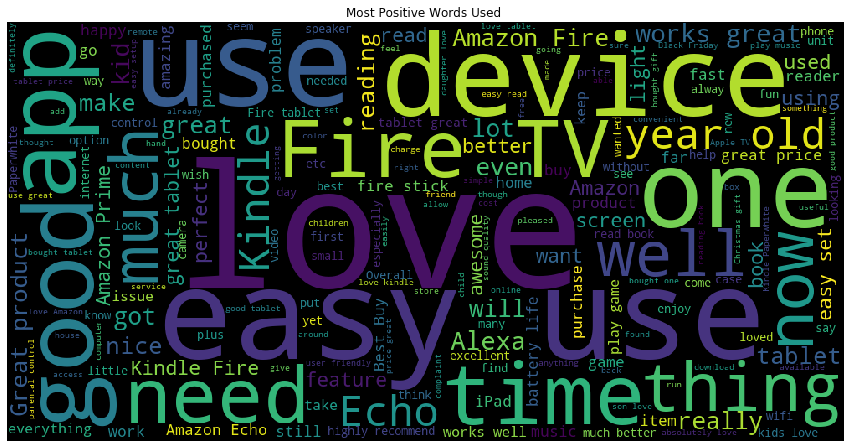

In [26]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Positive Words Used ")
plt.axis("off")
plt.show()

In [27]:
negativeWords=words = pd.Series(' '.join(df[df['sentiment']==0]['reviews.text']).split())

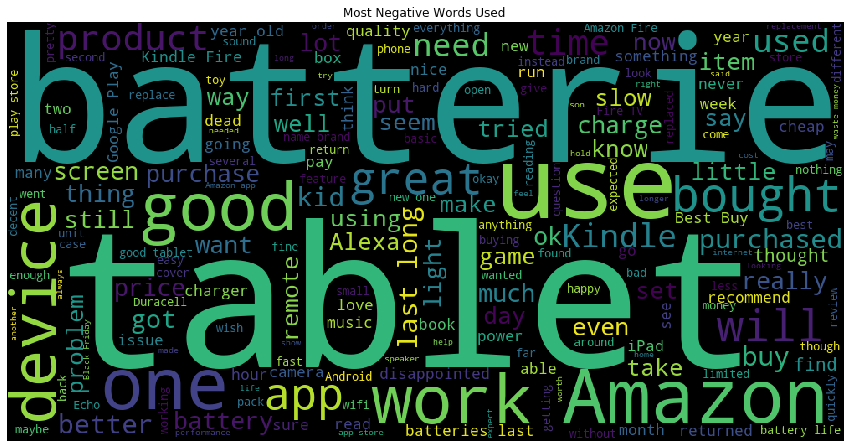

In [28]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Negative Words Used ")
plt.axis("off")
plt.show()

## NATURAL LANGUAGE PROCESSING

In [29]:
def cleanString(text):
    text = text.lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text

In [30]:
import nltk
nltk.download('stopwords')
stopword_list = stopwords.words('english')
suitable_stopwords=[]
l =["n'",'nor','no','not']
for i in stopword_list:
    if not any(word in i for word in l):
        suitable_stopwords.append(i)
print(stopword_list)
print(suitable_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
suitable_stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
                    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
                    'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
                    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
                    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
                    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
                    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
                    'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only',
                    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've",
                    'd', 'll', 'ma', 'm', 'o', 're', 've', 'y']
replace_list=['ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"]

In [32]:
nltk.download('punkt')
def remove_stopwords(stmt):
    filtered_sentence = []
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in suitable_stopwords:
            if w not in replace_list:
                filtered_sentence.append(w)
            else:
                filtered_sentence.append('not')
    return " ".join(filtered_sentence)
remove_stopwords('this product so far has not disappointed my children love to use it and i like the ability to monitor control what content they see with ease ')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'product far not disappointed children love use like ability monitor control content see ease'

In [33]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def lemmatize(text):
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return " ".join(lemmatized_sentence)
    
lemmatize('product far not disappointed children love use like ability monitor control content see ease')    

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'product far not disappointed child love use like ability monitor control content see ease'

In [34]:
df['text']=df['reviews.text'].apply(cleanString)

In [35]:
df['text']=df['text'].apply(remove_stopwords)

In [36]:
df['text']=df['text'].apply(lemmatize)

In [37]:
df['reviews.text'].iloc[0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

In [38]:
df['text'].iloc[0]

'product far not disappointed child love use like ability monitor control content see ease'

# TF-IDF

In [39]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(df['text'])
features = vectorizer.transform(df['text'])

features.toarray()

array([[0.351511, 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

In [40]:
df.iloc[0]

reviews.text      This product so far has not disappointed. My c...
reviews.rating                                                    5
sentiment                                                         1
text              product far not disappointed child love use li...
Name: 0, dtype: object

In [41]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

In [42]:
tf_idf.head()

,ability,able,absolutely,access,account,actually,ad,add,addition,additional,...,worry,worth,would,wrong,year,yes,yet,young,youtube,yr
0,0.351511,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.128464,0.0,0.145339,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.143334,0.0,0.0,0.0,0.0,0.0,0.187616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
tf_idf.iloc[0]['ease']

0.3583056382408408

## FITTING MODEL FOR DATASET

In [44]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, df['sentiment'], test_size=0.2, random_state=42)

In [45]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(30181, 700)
Test Set Shape		:(7546, 700)


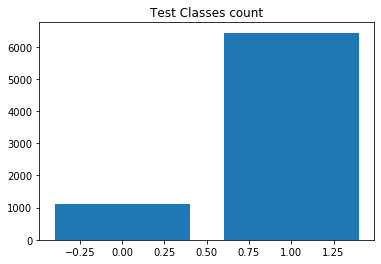

In [46]:
counts=y_test.value_counts()
plt.title("Test Classes count")
plt.bar(counts.index, counts.values)
plt.show()

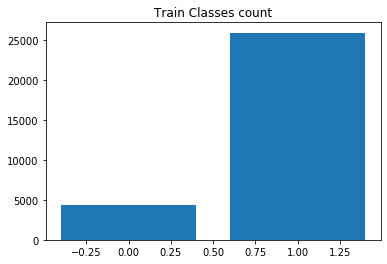

In [47]:
counts=y_train.value_counts()
plt.title("Train Classes count")
plt.bar(counts.index, counts.values)
plt.show()

In [48]:
yy=pd.DataFrame(y_train)

In [49]:
train_data = pd.concat([X_train,yy],axis=1)

In [50]:
train_data.head()

,ability,able,absolutely,access,account,actually,ad,add,addition,additional,...,worth,would,wrong,year,yes,yet,young,youtube,yr,sentiment
25313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414432,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
35729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [51]:
target_count = train_data['sentiment'].value_counts()
negative_class = train_data[train_data['sentiment'] == 0]
positive_class = train_data[train_data['sentiment'] == 1]
negative_over = negative_class.sample(target_count[1], replace=True)
df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,ability,able,absolutely,access,account,actually,ad,add,addition,additional,...,worth,would,wrong,year,yes,yet,young,youtube,yr,sentiment
25914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215298,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1
6787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.34483,0.0,0.0,0.0,0.0,0.0,1
32325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1
36791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0
19575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1


In [52]:
df_train_over['sentiment'].value_counts()

1    25875
0    25875
Name: sentiment, dtype: int64

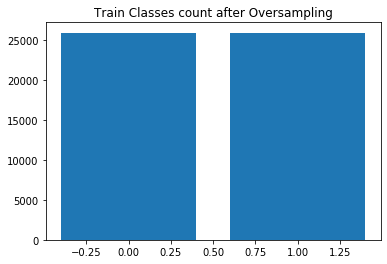

In [53]:
counts=df_train_over['sentiment'].value_counts()
plt.title("Train Classes count after Oversampling")
plt.bar(counts.index, counts.values)
plt.show()

In [54]:
X_train=df_train_over.iloc[:,:-1]
y_train=df_train_over['sentiment']

In [55]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (8,8))
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix') 

              precision    recall  f1-score   support

           0       0.48      0.82      0.60      1106
           1       0.97      0.84      0.90      6440

   micro avg       0.84      0.84      0.84      7546
   macro avg       0.72      0.83      0.75      7546
weighted avg       0.89      0.84      0.86      7546

AUC  0.8347344523940562


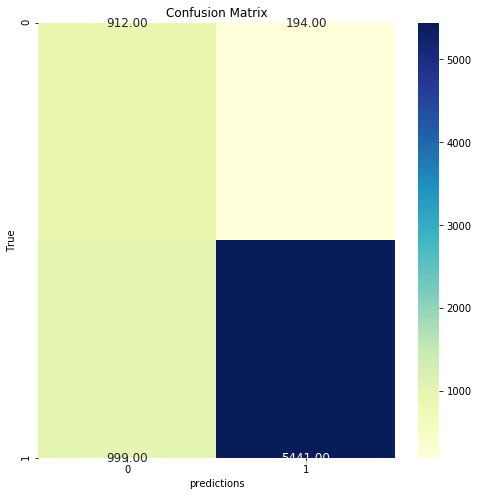

In [56]:
modeling(MultinomialNB())

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      1106
           1       0.95      0.87      0.91      6440

   micro avg       0.85      0.85      0.85      7546
   macro avg       0.72      0.81      0.75      7546
weighted avg       0.89      0.85      0.86      7546

AUC  0.8097757292239958


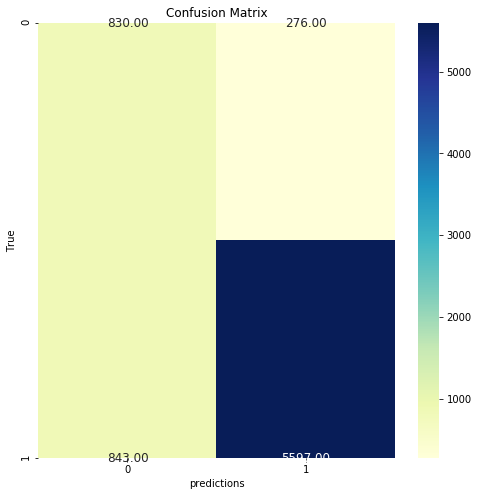

In [57]:
modeling(XGBClassifier())

C:\Users\kavya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1106
           1       0.96      0.96      0.96      6440

   micro avg       0.93      0.93      0.93      7546
   macro avg       0.86      0.85      0.85      7546
weighted avg       0.93      0.93      0.93      7546

AUC  0.850815708782137


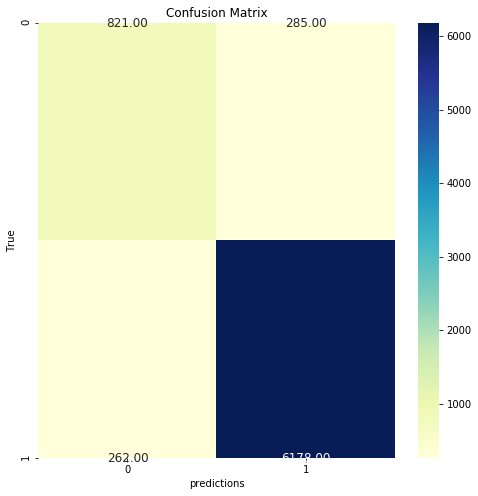

In [59]:
from sklearn.ensemble import RandomForestClassifier
modeling(RandomForestClassifier())